In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [39]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [40]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 8
)

In [41]:
dataset = pd.read_csv("csv/insurance.csv")
dataset.dropna(inplace=True)
# Change a column values to not be categorical
dataset['region'] = dataset['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
dataset['sex'] = dataset['sex'].map({'male':0, 'female':1})
dataset['smoker'] = dataset['smoker'].map({'yes':1, 'no':0})
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [42]:
tester = tester(X, y, generator, 10, 2, 500, verbose = True, test_size = 0.3, random_state = 17)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.7452322358839025 Generation best 0.6962099870789826
Split:  1 Feature:  1
Iteration:  199 Best fitness:  0.11331230053464703 Generation best 0.10119028595170365
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.7585185117544733 Generation best 0.7359455399661223
Split:  1 Feature:  3
Iteration:  199 Best fitness:  0.13492646890965787 Generation best 0.12253051049433161
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.7333430735584847 Generation best 0.7075649589312538
Split:  1 Feature:  5
Iteration:  199 Best fitness:  0.12610547750692847 Generation best 0.10310789277838406
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.7430543824164586 Generation best 0.7181528880528529
Split:  1 Feature:  7
Iteration:  199 Best fitness:  0.11351775840893419 Generation best 0.11275071567826211
Split:  0 Feature:  8
Iteration:  199 Best fitness:  0.7145505266570178 Generation best 0.6864712838377705
Split:  1 Feature:  9
Iterati

In [43]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

8
7
8
8
8
8
8
8
8
8


In [44]:
tester.test_models(notests=20)

Iteration 4 - MSE 17188733.109110873, R2 0.859002747641527, MAE 2378.5723561080104, NEW_MSE 18081249.798041034, NEW_R2 0.8516815332143548, NEW_MAE 2297.627039469343
Iteration 9 - MSE 17188733.109110873, R2 0.859002747641527, MAE 2378.5723561080104, NEW_MSE 18081249.798041034, NEW_R2 0.8516815332143548, NEW_MAE 2297.627039469343
Iteration 14 - MSE 17188733.109110873, R2 0.859002747641527, MAE 2378.5723561080104, NEW_MSE 18081249.798041034, NEW_R2 0.8516815332143548, NEW_MAE 2297.627039469343
Iteration 19 - MSE 17188733.109110873, R2 0.859002747641527, MAE 2378.5723561080104, NEW_MSE 18081249.798041034, NEW_R2 0.8516815332143548, NEW_MAE 2297.627039469343
Iteration 4 - MSE 32553224.448253118, R2 0.7329695461860725, MAE 4092.005861773325, NEW_MSE 32318192.676009096, NEW_R2 0.7348974854875318, NEW_MAE 3811.171033485991
Iteration 9 - MSE 32332139.86895521, R2 0.7347830782260406, MAE 4080.786758741542, NEW_MSE 30327283.643149048, NEW_R2 0.7512286892794005, NEW_MAE 3917.6738272400853
Iteratio

In [45]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,1.718873e+07,0.859003,2378.572356,1.808125e+07,0.851682,2297.627039
1,SGDRegressor,3.226287e+07,0.735351,4048.885139,3.097704e+07,0.745899,3856.836661
2,GradientBoostingRegressor,2.770086e+07,0.772773,2834.242216,2.291857e+07,0.812002,2338.476125


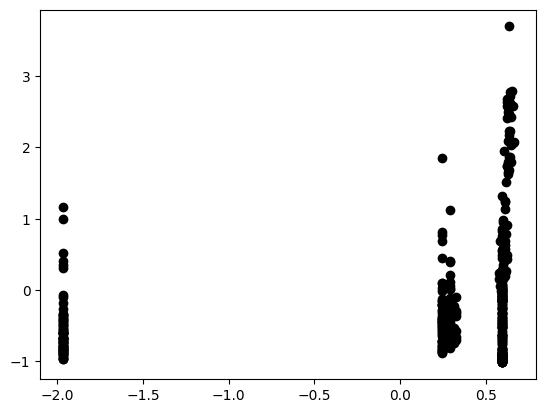

Min:  -1.9681752566575141 Max:  0.6633713426822103 Mean:  0.04614046229957058 Std:  0.9666946676591422


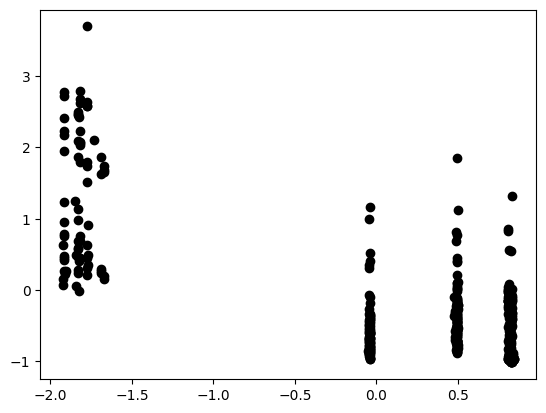

Min:  -1.9239193186298138 Max:  0.8419548164758538 Mean:  0.08059548402990795 Std:  0.9666282501634241


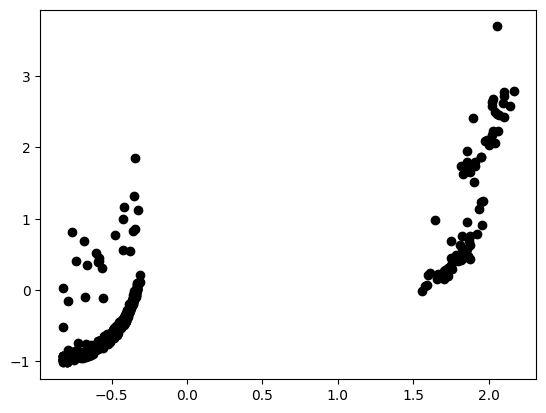

Min:  -0.8231548542123109 Max:  2.1650233758151494 Mean:  -0.07334157693154503 Std:  0.9507442732910384


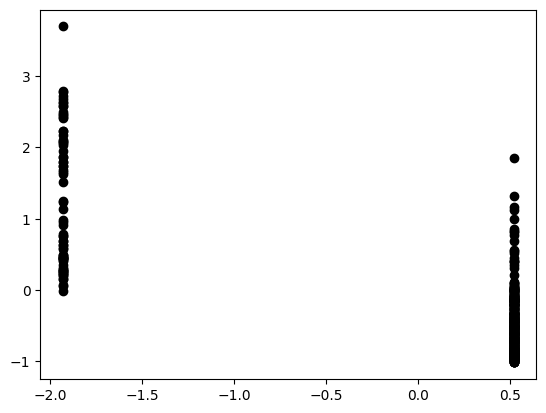

Min:  -1.930614658686941 Max:  0.5179697822036728 Mean:  0.05505332318562249 Std:  0.9587483193070414


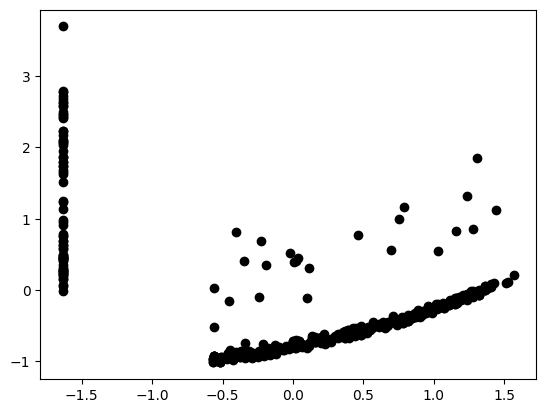

Min:  -1.6351045877593677 Max:  1.566591029967287 Mean:  0.00978301043514001 Std:  0.9733680112067408


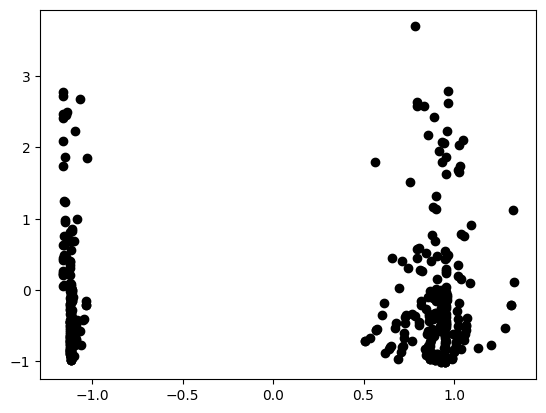

Min:  -1.1613366364334472 Max:  1.3292190908090218 Mean:  0.004102200418331827 Std:  1.0098052734009477


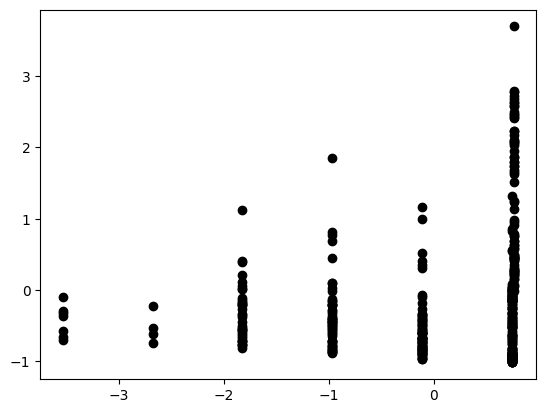

Min:  -3.5325702817731988 Max:  0.7606797173489908 Mean:  0.02253671617207665 Std:  1.0152877673191116


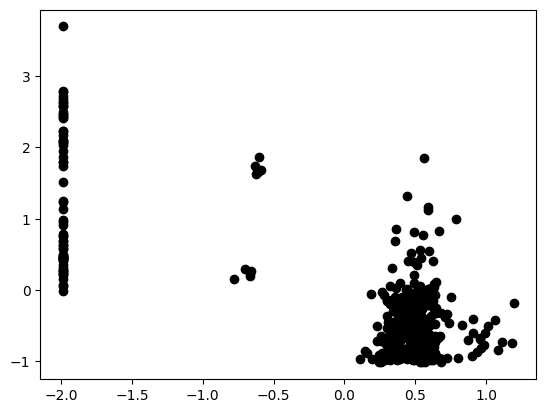

Min:  -1.9873591403530888 Max:  1.193561947648185 Mean:  0.070561529291744 Std:  0.9413744018530814


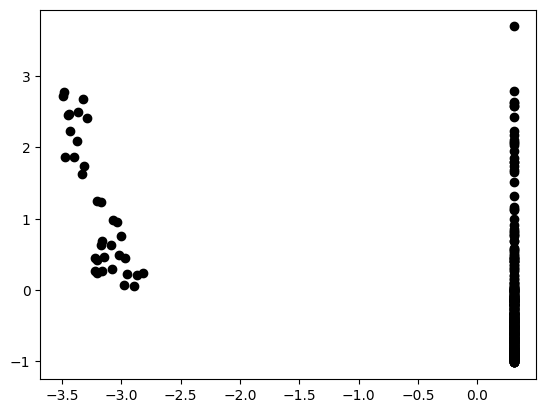

Min:  -3.491737522973591 Max:  0.30491288967327734 Mean:  0.0003641845221375122 Std:  0.9877314600672291


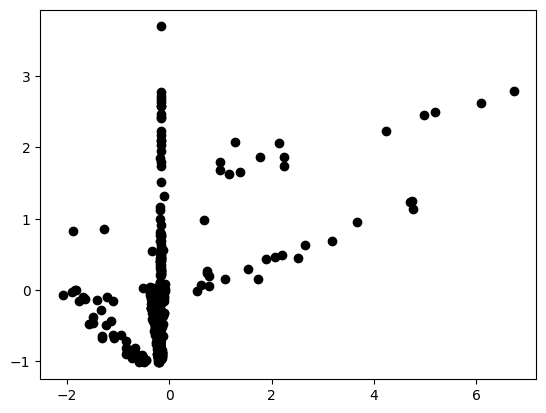

Min:  -2.0740217861673176 Max:  6.72663652199598 Mean:  -0.05879419016838255 Std:  0.9639001711733541


In [46]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())